In [39]:
import pandas as pd 

def process(df, name="dataframe", newline=False, head=False):
    print(f"processing {name}")
    print(f"  found {df.shape[0]} rows")
    print(f"  found {df.shape[1]} columns")
    print()

    if head:
        print(f"  first 5 rows")
        print(df.head())
        print()
    
    print(f"  found {df.duplicated().sum()} duplicate values")
    print(f"  found {df.isnull().sum().sum()} null fields")

    df.drop_duplicates()
    df.dropna()

    if (newline): print()
    return df

index = process(pd.read_csv("./datasets/sdg_index.csv"), "index", True)
report = process(pd.read_csv("./datasets/sdg_report.csv"), "report", True)

merged = pd.merge(index, report, on=["country_code", "country"])
merged = process(merged, "merged", True, True)
merged.to_csv("./merged.csv", index=False)



processing index
  found 99 rows
  found 21 columns

  found 1 duplicate values
  found 4 null fields

processing report
  found 167 rows
  found 4 columns

  found 1 duplicate values
  found 15 null fields

processing merged
  found 97 rows
  found 23 columns

  first 5 rows
  country_code      country  year  sdg_index_score  goal_1_score  \
0          AFG  Afghanistan  2000             36.0          28.8   
1          AFG  Afghanistan  2001             36.3          28.8   
2          AFG  Afghanistan  2002             36.3          28.8   
3          AFG  Afghanistan  2003             36.7          28.8   
4          AFG  Afghanistan  2004             37.1          28.8   

   goal_2_score  goal_3_score  goal_4_score  goal_5_score  goal_6_score  ...  \
0          27.3          19.2           1.6          20.8          32.4  ...   
1          30.6          19.4           1.6          20.8          32.4  ...   
2          30.7          19.7           1.6          20.8          32.7  .

In [45]:
import matplotlib.pyplot as plt
import random

# sdx index score over time

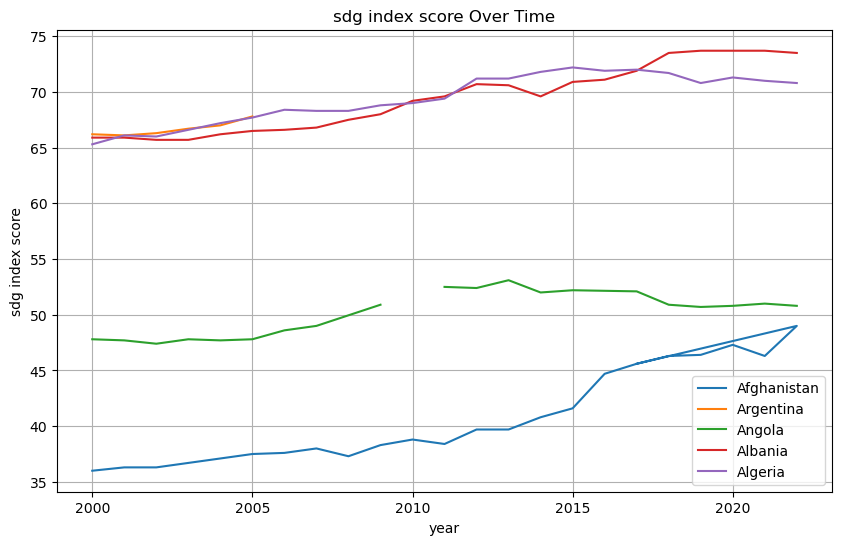

In [49]:
country_list = df['country'].unique().tolist()
num_countries = 5
selected_countries = random.sample(country_list, num_countries)
countries_data = df[df['country'].isin(selected_countries)]

plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = countries_data[countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['sdg_index_score'], label=country)

plt.xlabel('year')
plt.ylabel('sdg index score')
plt.title('sdg index score Over Time')
plt.legend() 
plt.grid(True)
plt.show()

# regional comparison

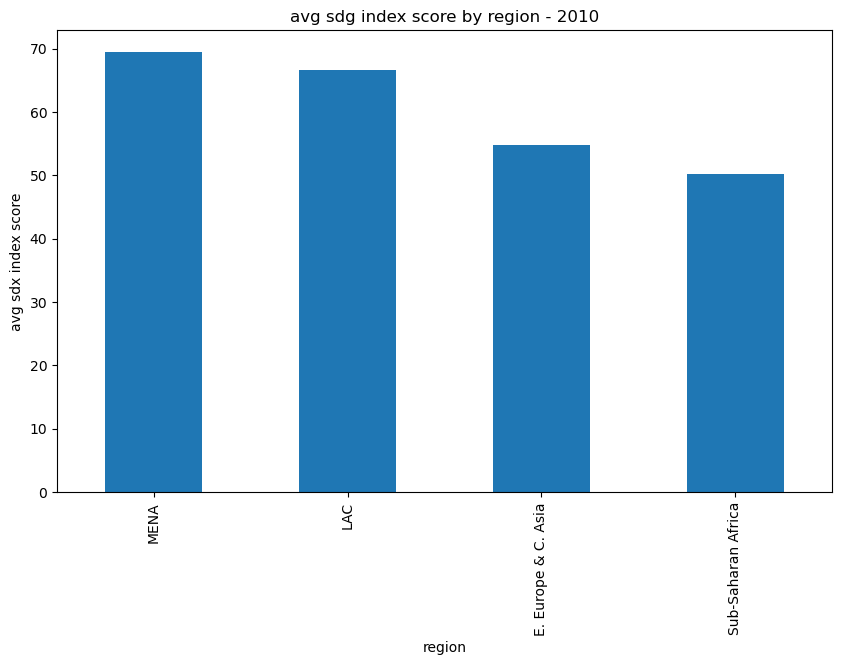

In [52]:
comparison_year = 2010
regional_scores = df.groupby('region')['sdg_index_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
regional_scores.plot(kind='bar') 

plt.xlabel('region')
plt.ylabel('avg sdx index score')
plt.title(f'avg sdg index score by region - {comparison_year}')
plt.show()